# European Soccer (Football) Player Value Analysis

There are thousands of professional soccer players playing in various European Leagues, and every Summer and Winter, the Transfer Market opens up to allow players to be bought and sold by clubs all around the world. In every transfer season there are media frenzies with record breaking transfer fees, and the pundits and fans hold arguments about players' value. I wanted to dive into the data to see what seems to be driving factors behind the players market value. Is it purely based on skills and sporting performances, or is there something else going on?

I found a dataset on Kaggle for 2017~2018 season (https://www.kaggle.com/datasets/kriegsmaschine/soccer-players-values-and-their-statistics/data)

In [73]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#Load dataset

# It seems the default delimiter (comma) may not be correct. Let's try detecting the delimiter and load the file again.
with open("transfermarkt_fbref_201718.csv", 'r') as file:
    sample = file.read(1024)  # Read first 1024 bytes for sample

# Use Python's built-in csv.Sniffer to detect delimiter
import csv
sniffer = csv.Sniffer()
dialect = sniffer.sniff(sample)

# Now that we have the detected delimiter, let's try reading the file again with the correct delimiter
data = pd.read_csv("transfermarkt_fbref_201718.csv", delimiter=dialect.delimiter)

# Display the first few rows again to check if it's correctly formatted now
data.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [52]:
data['value'].describe()

count    2.232000e+03
mean     9.594643e+06
std      1.668863e+07
min      5.000000e+03
25%      1.500000e+06
50%      4.000000e+06
75%      1.000000e+07
max      1.800000e+08
Name: value, dtype: float64

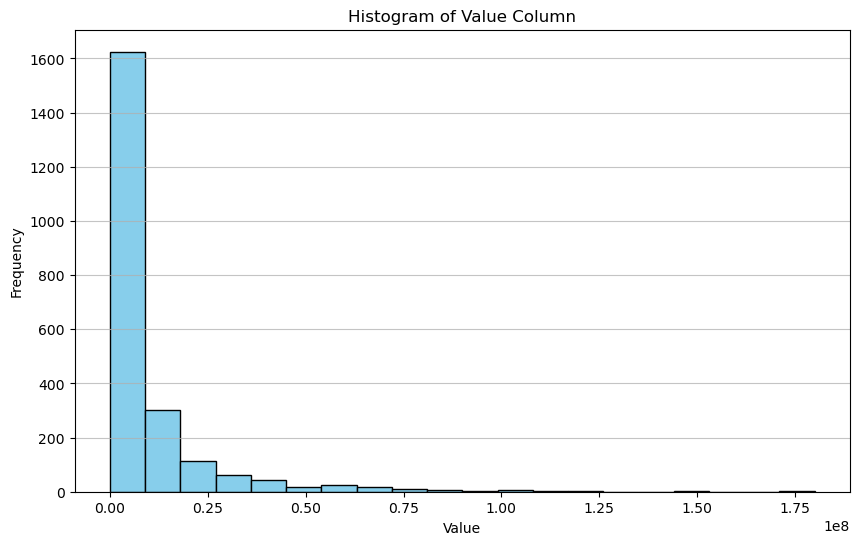

In [56]:
#Plot histogram of "value"

# Plotting the histogram for the "value" column
plt.figure(figsize=(10, 6))
plt.hist(data['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Value Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

Very interesting to see that the value of football players are not normally distributed at all, as I initially assumed. 

In [61]:
#Check the distribution by position2

# Understand how many unique position2 values are in the data set.

unique_positions = data['position2'].unique()

sorted(unique_positions)

['Defender - Centre-Back',
 'Defender - Left-Back',
 'Defender - Right-Back',
 'Goalkeeper',
 'attack - Centre-Forward',
 'attack - Left Winger',
 'attack - Right Winger',
 'attack - Second Striker',
 'midfield - Attacking Midfield',
 'midfield - Central Midfield',
 'midfield - Defensive Midfield',
 'midfield - Left Midfield',
 'midfield - Right Midfield']

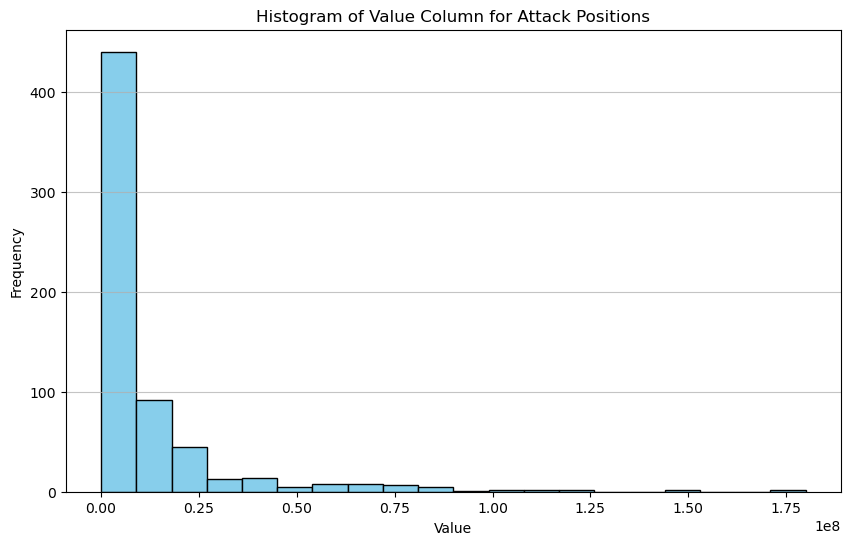

In [60]:
#Attackers

# Filter records that include "attack" in 'position2'
attack_data = data[data['position2'].str.startswith('attack')]

# Plotting the histogram for the "value" column for records including "attack" in 'position2'
plt.figure(figsize=(10, 6))
plt.hist(attack_data['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Value Column for Attack Positions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Showing the plot
plt.show()

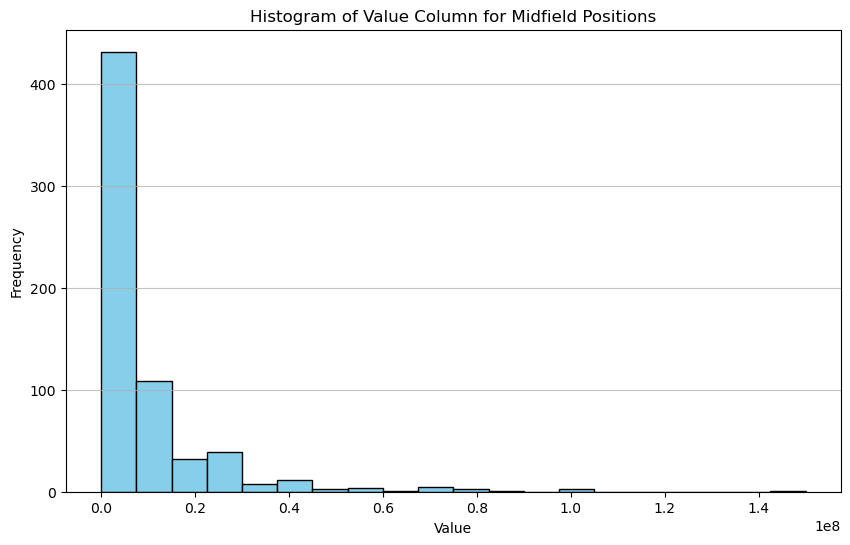

In [62]:
#Midfielders

# Filter records that include "midfield" in 'position2'
attack_data = data[data['position2'].str.startswith('midfield')]

# Plotting the histogram for the "value" column for records including "attack" in 'position2'
plt.figure(figsize=(10, 6))
plt.hist(attack_data['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Value Column for Midfield Positions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Showing the plot
plt.show()


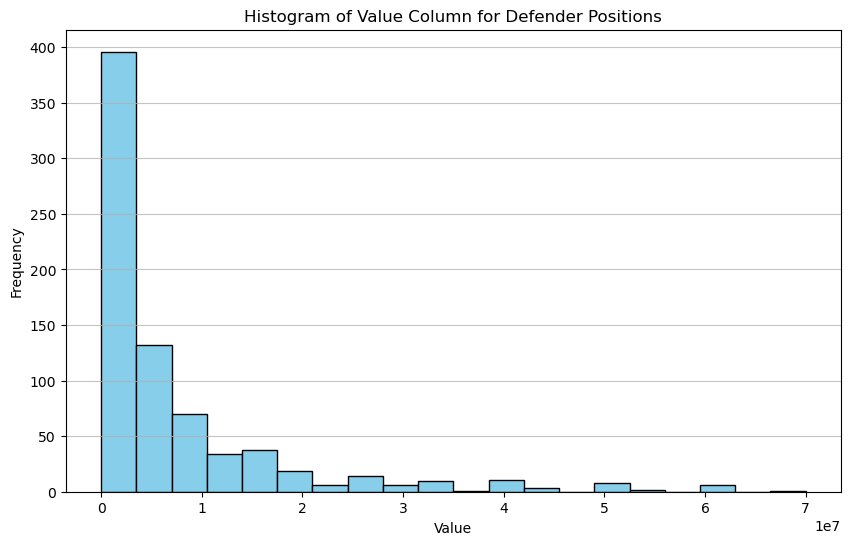

In [63]:
#Defenders

# Filter records that include "Defender" in 'position2'
attack_data = data[data['position2'].str.startswith('Defender')]

# Plotting the histogram for the "value" column for records including "attack" in 'position2'
plt.figure(figsize=(10, 6))
plt.hist(attack_data['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Value Column for Defender Positions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Showing the plot
plt.show()

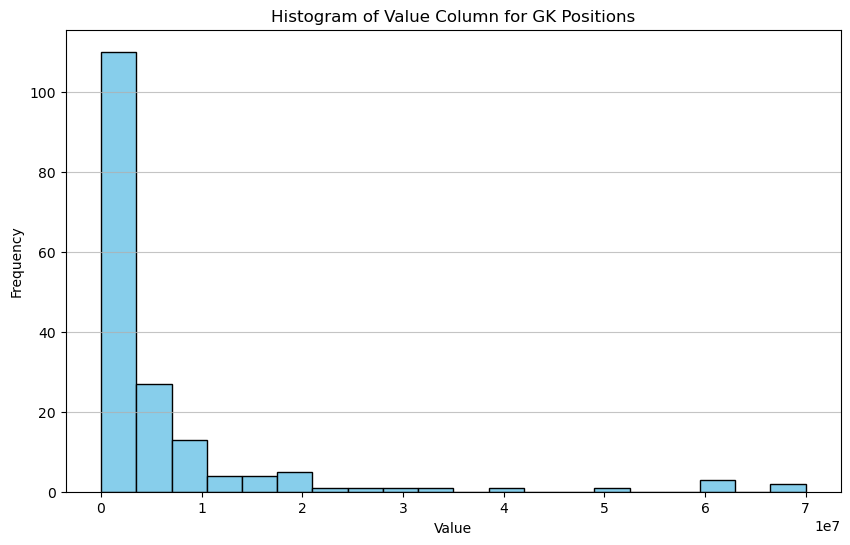

In [64]:
#Goalkeepers

# Filter records that include "Goalkeeper" in 'position2'
attack_data = data[data['position2'].str.startswith('Goalkeeper')]

# Plotting the histogram for the "value" column for records including "attack" in 'position2'
plt.figure(figsize=(10, 6))
plt.hist(attack_data['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Value Column for GK Positions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Showing the plot
plt.show()

Heavy Right-Skewed distribution is consistent for all positions.

In [31]:
# Who were the most valuable players this season?

sorted_data = data.sort_values(by='value', ascending=False)

print(sorted_data.head())


      Unnamed: 0           player nationality position            squad  age  \
1580        1795           Neymar      br BRA    FW,MF        Paris S-G   25   
198         1654     Lionel Messi      ar ARG    FW,MF        Barcelona   30   
1281         617  Kevin De Bruyne      be BEL       MF  Manchester City   26   
1982        1249       Harry Kane     eng ENG       FW        Tottenham   24   
1199        2194    Mohamed Salah      eg EGY    FW,MF        Liverpool   25   

      birth_year      value  height                      position2  ... Pts/G  \
1580        1992  180000000     175           attack - Left Winger  ...  2.45   
198         1987  180000000     170          attack - Right Winger  ...  2.45   
1281        1991  150000000     181  midfield - Attacking Midfield  ...  2.63   
1982        1993  150000000     188        attack - Centre-Forward  ...  2.03   
1199        1992  150000000     175          attack - Right Winger  ...  1.97   

        xG   xGA  xGDiff  xGDiff

I'm not surprised to see these names at all...

It's commonly known that the attacking players are more expensive than other positions. I want to confirm this by looking at 'position2' which is more descriptive than 'position' column.

In [36]:
# Calculate the mean 'value' for each unique position in the 'position2' column
mean_value_by_position = data.groupby('position2')['value'].mean()

# Sort the results by mean 'value' in descending order
sorted_mean_value_by_value = mean_value_by_position.sort_values(ascending=False)

# Display the sorted mean values
print(sorted_mean_value_by_value)



position2
midfield - Attacking Midfield    1.465446e+07
attack - Second Striker          1.375250e+07
attack - Left Winger             1.334149e+07
attack - Right Winger            1.308215e+07
attack - Centre-Forward          1.187948e+07
midfield - Central Midfield      9.640271e+06
Defender - Centre-Back           8.605592e+06
midfield - Defensive Midfield    8.011644e+06
Defender - Left-Back             6.920149e+06
midfield - Right Midfield        6.360000e+06
Goalkeeper                       6.333879e+06
Defender - Right-Back            6.245306e+06
midfield - Left Midfield         4.497857e+06
Name: value, dtype: float64


I'm slightly surprised that Center Forwards aren't the most expensive category by mean, but extreme outliers might exist. Get a comprehensive view using box plots.

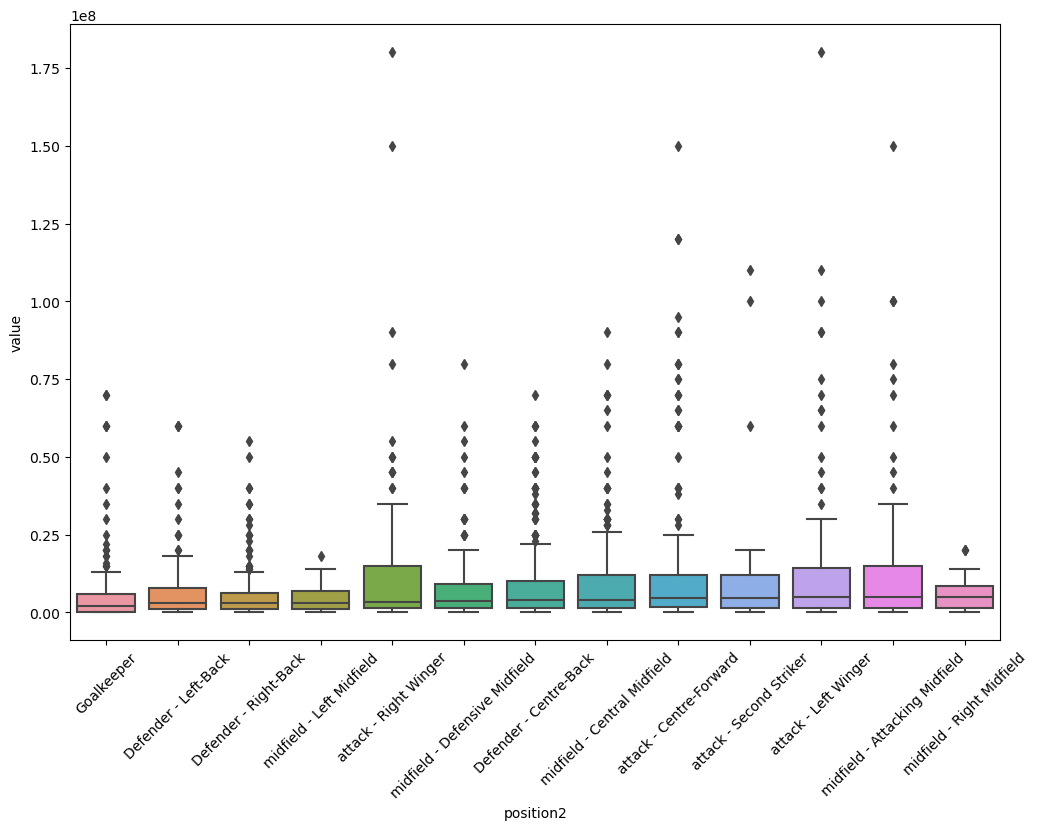

In [50]:
#sort the positions by median values
median_values = data.groupby('position2')['value'].median().reset_index()

# Sort the means and extract the sorted 'position2' categories
sorted_positions = median_values.sort_values('value')['position2'].tolist()

# Create the boxplot with ordered 'position2' categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
sns.boxplot(x='position2', y='value', data=data, order=sorted_positions)

# Rotate the x labels if they are crowded
plt.xticks(rotation=45)

plt.show()

Definitely see outliers here. Let's see who they are.

In [46]:
#Looking at Defenders First

# Filter the DataFrame for rows where 'position2' contains 'Defender'
defenders_data = data[data['position2'].str.contains('Defender')]

# Find the top 10 defenders by 'value'
top_10_defenders = defenders_data.nlargest(10, 'value')[['player', 'position2', 'value']]

# Display the result
print(top_10_defenders)





                 player               position2     value
1        Raphaël Varane  Defender - Centre-Back  70000000
3         Samuel Umtiti  Defender - Centre-Back  60000000
10         Mats Hummels  Defender - Centre-Back  60000000
11    Kalidou Koulibaly  Defender - Centre-Back  60000000
187          Jordi Alba    Defender - Left-Back  60000000
1217            Marcelo    Defender - Left-Back  60000000
1622            Marcelo    Defender - Left-Back  60000000
21           Marquinhos  Defender - Centre-Back  55000000
202       Sergi Roberto   Defender - Right-Back  55000000
22      Aymeric Laporte  Defender - Centre-Back  50000000


In [47]:
# Now Midfielders

# Filter the DataFrame for rows where 'position2' contains 'Defender'
defenders_data = data[data['position2'].str.contains('midfield')]

# Find the top 10 by 'value'
top_10_mids = defenders_data.nlargest(10, 'value')[['player', 'position2', 'value']]
    
# Display the result
print(top_10_mids)

                 player                      position2      value
1281    Kevin De Bruyne  midfield - Attacking Midfield  150000000
191   Philippe Coutinho  midfield - Attacking Midfield  100000000
1182  Philippe Coutinho  midfield - Attacking Midfield  100000000
1974          Dele Alli  midfield - Attacking Midfield  100000000
12           Paul Pogba    midfield - Central Midfield   90000000
32           Toni Kroos    midfield - Central Midfield   80000000
189     Sergio Busquets  midfield - Defensive Midfield   80000000
1979  Christian Eriksen  midfield - Attacking Midfield   80000000
1619               Isco  midfield - Attacking Midfield   75000000
45                 Koke    midfield - Central Midfield   70000000


In [48]:
# Now Attacking players

# Filter the DataFrame for rows where 'position2' contains 'Defender'
defenders_data = data[data['position2'].str.contains('attack')]

# Find the top 10 by 'value'
top_10_attack = defenders_data.nlargest(10, 'value')[['player', 'position2', 'value']]

# Display the result
print(top_10_attack)

                 player                position2      value
198        Lionel Messi    attack - Right Winger  180000000
1580             Neymar     attack - Left Winger  180000000
1199      Mohamed Salah    attack - Right Winger  150000000
1982         Harry Kane  attack - Centre-Forward  150000000
1434      Kylian Mbappé  attack - Centre-Forward  120000000
1576      Kylian Mbappé  attack - Centre-Forward  120000000
469         Eden Hazard     attack - Left Winger  110000000
949        Paulo Dybala  attack - Second Striker  110000000
151   Antoine Griezmann  attack - Second Striker  100000000
1626  Cristiano Ronaldo     attack - Left Winger  100000000


Not surprised by these names, but worth noting the attacking (goal scoring/assisting) positions seem to have much higher upperbound in value.

In [66]:
data.columns

Index(['Unnamed: 0', 'player', 'nationality', 'position', 'squad', 'age',
       'birth_year', 'value', 'height', 'position2',
       ...
       'Pts/G', 'xG', 'xGA', 'xGDiff', 'xGDiff/90', 'Attendance', 'CL',
       'WinCL', 'CLBestScorer', 'Season'],
      dtype='object', length=400)

In [68]:
column_names = data.columns.tolist()  # Convert column names to a list

# Define a function to print the column names in chunks of 'n' names per line
def print_columns_in_chunks(column_names, n):
    for i in range(0, len(column_names), n):
        print(column_names[i:i+n])

# Example usage: print 10 column names per line
print_columns_in_chunks(column_names, 10)

['Unnamed: 0', 'player', 'nationality', 'position', 'squad', 'age', 'birth_year', 'value', 'height', 'position2']
['foot', 'league', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow']
['cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90']
['xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90']
['shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance']
['passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long']
['xa_net', 'assisted_shots', 'passes_into_final_thi

In [77]:
# 400x400 correlation analysis is too much, so I want to reduce the relationships down to just 10 highest correlated pairs.

corr_matrix = data.corr()

# Taking the absolute value of the correlation matrix to focus on the strength regardless of direction
abs_corr_matrix = corr_matrix.abs()

# Setting the diagonal values to 0 to avoid self-correlation
np.fill_diagonal(abs_corr_matrix.values, 0)

# Unstacking the correlation matrix to convert it into a Series of correlation pairs
corr_pairs = abs_corr_matrix.unstack()

# Sorting the pairs by correlation strength
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Getting the top 10 pairs
top_10_pairs = sorted_pairs.head(20) # Each pair appears twice (A,B) and (B,A), so we take 20 to get 10 unique pairs

top_10_pairs


/var/folders/n_/95rcqzx91d1bf_zbx38smk080000gn/T/ipykernel_79165/1378711871.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


minutes_gk                 minutes_90s_gk               1.000000
minutes_90s_gk             minutes_gk                   1.000000
minutes_90s                minutes                      0.999997
minutes                    minutes_90s                  0.999997
npxg_xa_per90m             xg_xa_per90m                 0.999893
xg_xa_per90m               npxg_xa_per90m               0.999893
games_starts_gk            minutes_90s_gk               0.999864
minutes_90s_gk             games_starts_gk              0.999864
games_starts_gk            minutes_gk                   0.999860
minutes_gk                 games_starts_gk              0.999860
minutes_90s_gk             games_gk                     0.999843
games_gk                   minutes_90s_gk               0.999843
minutes_gk                 games_gk                     0.999843
games_gk                   minutes_gk                   0.999843
goals_assists_per90m       goals_assists_pens_per90m    0.999792
goals_assists_pens_per90m

In [79]:
# it seems like there are too many Goalkeeper specific features. I want to separate out Goalkeepers and GK specific columns from the dataset.

data_non_gk = data[data['position2'] != 'Goalkeeper']

data_non_gk.describe()

,Unnamed: 0,age,birth_year,value,height,games,games_starts,minutes,goals,assists,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
count,2058.000000,2058.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1338.615646,25.236152,1990.448980,9.870334e+06,181.504373,19.269193,15.017493,1348.084548,1.998056,1.337221,...,-0.923712,50.825559,1.362255,48.584742,49.193780,-0.603839,-0.015690,0.181730,0.008260,0.000486
std,778.196350,4.330379,44.105726,1.697770e+07,6.175384,10.989562,10.995720,949.123228,3.644509,2.048509,...,28.779018,18.162133,0.481429,12.499713,9.975845,20.434150,0.545445,0.385715,0.090533,0.022043
min,0.000000,0.000000,0.000000,5.000000e+03,162.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-51.000000,20.000000,0.530000,30.300000,23.000000,-41.500000,-1.090000,0.000000,0.000000,0.000000
25%,655.250000,22.000000,1988.000000,1.500000e+06,177.000000,10.000000,5.000000,468.000000,0.000000,0.000000,...,-20.000000,38.000000,1.035000,39.200000,42.625000,-15.700000,-0.435000,0.000000,0.000000,0.000000
50%,1341.500000,25.000000,1992.000000,4.000000e+06,182.000000,20.000000,14.000000,1266.000000,1.000000,1.000000,...,-5.000000,48.000000,1.290000,45.300000,49.500000,-3.650000,-0.100000,0.000000,0.000000,0.000000
75%,2012.500000,28.000000,1995.000000,1.000000e+07,186.000000,29.000000,24.000000,2140.500000,2.000000,2.000000,...,14.000000,60.000000,1.617500,55.000000,55.300000,11.200000,0.290000,0.000000,0.000000,0.000000
max,2686.000000,40.000000,2001.000000,1.800000e+08,201.000000,38.000000,38.000000,3420.000000,34.000000,16.000000,...,79.000000,100.000000,2.630000,89.100000,75.900000,57.100000,1.500000,1.000000,1.000000,1.000000


In [82]:
# the following code removes all columns where the column headers contain the word "gk"

# Identifying columns to remove
columns_to_remove = [col for col in data.columns if 'gk' in col]

# Removing the identified columns from the DataFrame
data_non_gk = data.drop(columns=columns_to_remove)

# This code snippet assumes the presence of the DataFrame 'data' and iterates through its columns,
# dropping those that contain the substring "gk". Use this code snippet in your environment where 'data' is defined.

data_non_gk.describe()

,Unnamed: 0,age,birth_year,value,height,games,games_starts,minutes,goals,assists,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
count,2232.000000,2232.000000,2232.000000,2.232000e+03,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,1339.719086,25.416667,1990.341846,9.594643e+06,182.155466,19.136201,15.199821,1364.558692,1.845430,1.236111,...,-0.774194,50.934140,1.364910,48.670341,49.161738,-0.486111,-0.012504,0.182796,0.008961,0.000448
std,777.020300,4.413342,42.373350,1.668863e+07,6.455761,11.251029,11.273800,977.669435,3.540359,1.998719,...,28.874341,18.214265,0.482991,12.548968,9.986409,20.491746,0.547041,0.386586,0.094256,0.021167
min,0.000000,0.000000,0.000000,5.000000e+03,162.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-51.000000,20.000000,0.530000,30.300000,23.000000,-41.500000,-1.090000,0.000000,0.000000,0.000000
25%,656.750000,22.000000,1988.000000,1.500000e+06,178.000000,9.000000,5.000000,452.250000,0.000000,0.000000,...,-20.000000,38.000000,1.050000,39.200000,42.500000,-15.700000,-0.425000,0.000000,0.000000,0.000000
50%,1347.500000,25.000000,1991.000000,4.000000e+06,183.000000,20.000000,14.000000,1266.000000,0.000000,0.000000,...,-5.000000,48.000000,1.290000,45.600000,49.500000,-3.650000,-0.100000,0.000000,0.000000,0.000000
75%,2013.250000,28.000000,1995.000000,1.000000e+07,187.000000,29.000000,25.000000,2177.000000,2.000000,2.000000,...,14.000000,60.000000,1.620000,55.000000,55.300000,11.200000,0.290000,0.000000,0.000000,0.000000
max,2686.000000,40.000000,2001.000000,1.800000e+08,203.000000,38.000000,38.000000,3420.000000,34.000000,16.000000,...,79.000000,100.000000,2.630000,89.100000,75.900000,57.100000,1.500000,1.000000,1.000000,1.000000


In [83]:
# Look for new correlation pairs without GK data

corr_matrix = data_non_gk.corr()

# Taking the absolute value of the correlation matrix to focus on the strength regardless of direction
abs_corr_matrix = corr_matrix.abs()

# Setting the diagonal values to 0 to avoid self-correlation
np.fill_diagonal(abs_corr_matrix.values, 0)

# Unstacking the correlation matrix to convert it into a Series of correlation pairs
corr_pairs = abs_corr_matrix.unstack()

# Sorting the pairs by correlation strength
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Getting the top 10 pairs
top_10_pairs = sorted_pairs.head(20) # Each pair appears twice (A,B) and (B,A), so we take 20 to get 10 unique pairs

top_10_pairs


/var/folders/n_/95rcqzx91d1bf_zbx38smk080000gn/T/ipykernel_79165/2156123241.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_non_gk.corr()


minutes_90s                minutes                      0.999997
minutes                    minutes_90s                  0.999997
xg_xa_per90m               npxg_xa_per90m               0.999893
npxg_xa_per90m             xg_xa_per90m                 0.999893
goals_assists_pens_per90m  goals_assists_per90m         0.999792
goals_assists_per90m       goals_assists_pens_per90m    0.999792
goals_per90m               goals_pens_per90m            0.999770
goals_pens_per90m          goals_per90m                 0.999770
xg_per90m                  npxg_per90m                  0.999748
npxg_per90m                xg_per90m                    0.999748
passes_completed_shortm    passes_shortm                0.999690
passes_shortm              passes_completed_shortm      0.999690
passes_mediumm             passes_completed_mediumm     0.999596
passes_completed_mediumm   passes_mediumm               0.999596
passesm                    passes_completedm            0.999559
passes_completedm        

In [92]:
# There seems to a lot of columns that are redundant based on correlation nearing 1.


# Finding features with high correlation (0.99 or higher) with other features
# We will mark these as redundant based on the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) >= 0.99].stack().reset_index()

high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]

high_corr_pairs

# Identifying redundant features
# We'll consider one of each pair as redundant. This choice can be adjusted based on specific criteria.
redundant_features = set()
for _, row in high_corr_pairs.iterrows():
    # Adding the second feature of each pair to the set of redundant features
    redundant_features.add(row['level_1'])

# Displaying the redundant features
print(sorted(redundant_features))


['Pts', 'Pts/G', 'carries', 'dribbles_completed', 'dribbles_completedm', 'games_starts', 'gca_passes_livem', 'gcam', 'goal_kick_length_avg', 'goals_assists_pens_per90', 'goals_assists_pens_per90m', 'goals_assists_per90', 'goals_assists_per90m', 'goals_pens_per90', 'goals_pens_per90m', 'goals_per90', 'goals_per90m', 'minutes', 'minutes_90s', 'npxg_netm', 'npxg_per90', 'npxg_per90m', 'npxg_xa_per90', 'npxg_xa_per90m', 'passes', 'passes_completed', 'passes_completed_longm', 'passes_completed_medium', 'passes_completed_mediumm', 'passes_completed_short', 'passes_completed_shortm', 'passes_completedm', 'passes_into_final_thirdm', 'passes_into_penalty_aream', 'passes_live', 'passes_longm', 'passes_medium', 'passes_mediumm', 'passes_progressive_distancem', 'passes_received', 'passes_short', 'passes_shortm', 'passes_total_distancem', 'passesm', 'pct_goal_kicks_launched', 'players_dribbled_past', 'players_dribbled_pastm', 'progressive_passesm', 'saves', 'sca_passes_livem', 'scam', 'shots_on_tar

In [93]:

# Create a set of features considered primary (appearing in 'level_0')
primary_features = set(high_corr_pairs['level_0'])

# Define redundant features based on earlier logic but exclude those also listed as primary
redundant_features_to_remove = set(filter(lambda x: x not in primary_features, redundant_features))

# Now you have a set of redundant features excluding those that appear in the 'level_0' column
# If needed, convert this set back to a sorted list
sorted_redundant_features_list = sorted(redundant_features_to_remove)

sorted_redundant_features_list


[]

In [ ]:
# To ensure that for each pair of highly correlated features, only one feature is marked as redundant,
# and to sort the list of redundant features alphabetically, you can follow these steps.

# Assuming hig_corr_pairs contains pairs of features with high correlation (excluding self-correlations)

# Sorting the feature names within each pair alphabetically
# This step helps in consistently selecting one feature from each pair to mark as redundant
high_corr_pairs['sorted_pair'] = high_corr_pairs.apply(lambda row: sorted([row['level_0'], row['level_1']]), axis=1)
high_corr_pairs['feature_to_remove'] = high_corr_pairs['sorted_pair'].apply(lambda x: x[1])  # Always remove the second feature after sorting

# Dropping duplicates to ensure each feature is only considered once for removal
unique_redundant_features = high_corr_pairs['feature_to_remove'].drop_duplicates()

# Converting to a sorted list
sorted_redundant_features_list = sorted(unique_redundant_features)

sorted_redundant_features_list

# Note: This approach selects the second feature (alphabetically) from each pair to mark as redundant,
# ensuring that for each pair of highly correlated features, only one is selected for potential removal.
# Remember to adjust the initial data preparation and correlation analysis code accordingly
# to ensure 'high_corr_pairs' is defined as needed.


In [94]:
#Ensure 'value' is numeric, before running correlation 

data['value'] = pd.to_numeric(data['value'], errors='coerce')
numeric_data = data.select_dtypes(include=[np.number])


In [95]:
#calculate correlations

correlation_with_value = numeric_data.corr()['value'].drop('value', errors='ignore').sort_values(ascending=False)


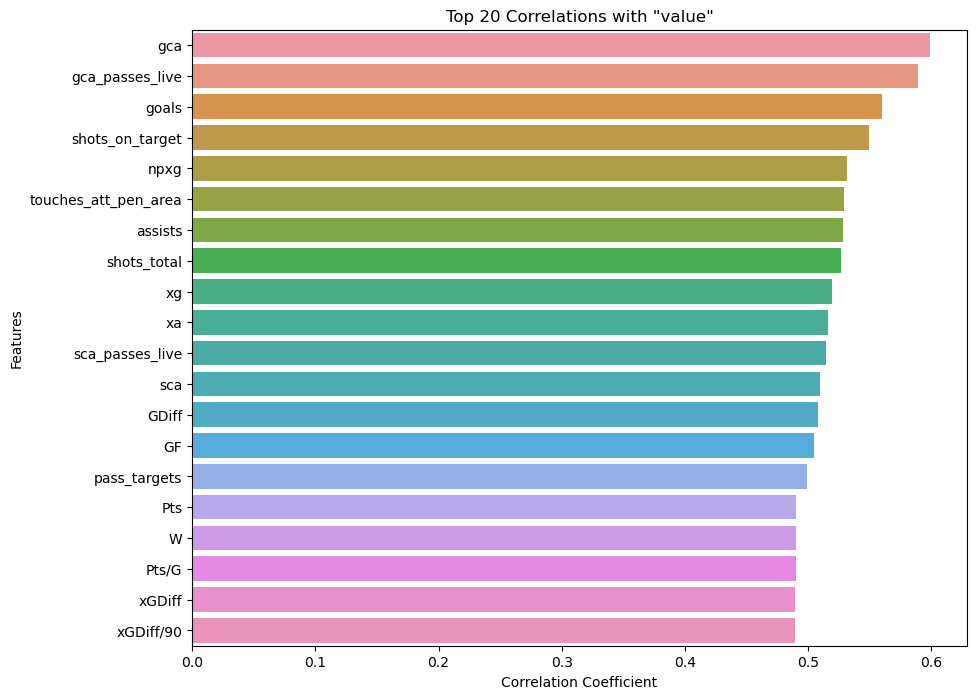

In [96]:
#Visualize the top 20 correlated features

# Plotting the top 20 correlations with 'value'
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_value.head(20).values, y=correlation_with_value.head(20).index)
plt.title('Top 20 Correlations with "value"')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Correlations

As suspected, player values seem most associated with goals or goal creating actions (GCA).